In [226]:
from ROOT import TFile
from ROOT import TLorentzVector
from ROOT import TH1F
from ROOT import TF1
import numpy as np
from ROOT import RooRealVar
from ROOT import RooFFTConvPdf
from ROOT import RooDataHist
from ROOT import RooDataSet
from ROOT import RooExponential
from ROOT import RooGaussian
from ROOT import RooPolynomial
from ROOT import RooVoigtian
from ROOT import RooArgList
from ROOT import RooArgSet
from ROOT import RooAddPdf
from ROOT import RooPlot
from ROOT import TLegend
from ROOT import RooFit
from ROOT import TLatex
from ROOT import RooChi2Var
from ROOT import TStyle
from ROOT import TCanvas, TFile, TPaveText, TH1F, TLegend, TTree
from ROOT import gStyle, TGraphErrors, TF1, TGraph, gPad, gRandom
from ROOT import kRed, kBlue
from ROOT import TFitResultPtr, TMatrixD
from ROOT import RooGenericPdf
from ROOT import RooFitResult
from ROOT import RooArgusBG


In [227]:
fin = TFile("DataSet_lowstat.root")
nt = fin.Get("data")

In [228]:
mass = RooRealVar("mass", "mass [GeV]", 2, 6);
nt.Print("v")

DataStore data (Dimuon data)
  Contains 500 entries
  Observables: 
    1)  mass = 2.78805  L(2 - 6) // [GeV] "The invariant mass"


In [229]:
frame3 = mass.frame(RooFit.Title(r"$\mu\bar{\mu}$"))
nt.plotOn(frame3)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: exemplo03


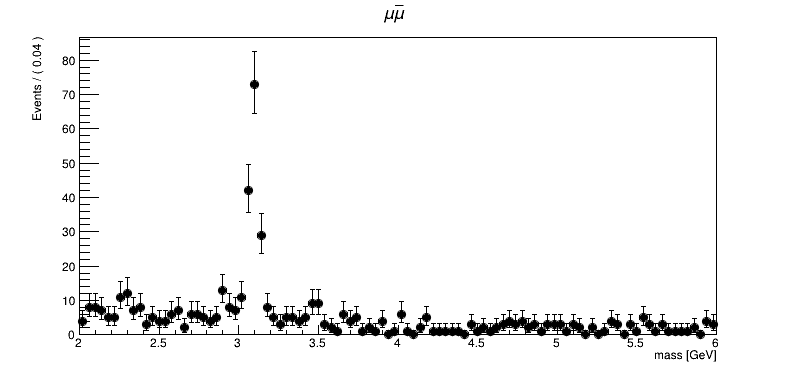

In [230]:
c3 = TCanvas("exemplo03","exemplo03",800,400)
frame3.Draw()
c3.Draw()

In [256]:
import ROOT
kPurple = ROOT.TColor.GetColor(148, 0, 211)



slope = RooRealVar("slope", "slope", 0.0, -10.0, 10.0)  # Parâmetro da inclinação da reta
intercept = RooRealVar("intercept", "intercept", 5, 5, 2.0)  # Parâmetro da interseção com o eixo y
mean_gauss = RooRealVar("mean_gauss", "mean_gauss",3.1, 3, 3.2)
sigma_gauss = RooRealVar("sigma_gauss", "sigma_gauss", 0.1, 0.0, 0.05)
mean_gauss_1 = RooRealVar("mean_gauss_1", "mean_gauss_1",3.5, 3.5, 3.5)
sigma_gauss_1 = RooRealVar("sigma_gauss_1", "sigma_gauss_1", 0.05, 0.01, 0.06)
sinal=RooRealVar("sinal", "sinal", 0.5, 0, 0.3);
sinal_1=RooRealVar("sinal_1", "sinal_1", 0.1, 0, 0.05);
sinal_2=RooRealVar("sinal_2", "sinal_2", 0.2, 0,0.2);

argpar= RooRealVar("argpar","argus shape parameter",5,0,5) ; 
argus= RooArgusBG("argus","Argus PDF",mass,5,argpar) ; 


linear = RooPolynomial("linear", "linear", mass, RooArgList(intercept, slope))
gauss = RooGaussian("gauss", "gauss", mass, mean_gauss, sigma_gauss)
gauss_1= RooGaussian("gauss_1", "gauss_1", mass, mean_gauss_1, sigma_gauss_1)

# Soma das duas gaussianas e da linear multiplicada pelo único parâmetro de amplitude
sum_pdf = RooAddPdf("sum_pdf", "Sum of Gaussian and Linear", RooArgList(gauss, gauss_1, argus), RooArgList(sinal,sinal_1,sinal_2))

# Ajusta a soma das duas gaussianas e da linear aos dados
sum_pdf.fitTo(nt, RooFit.Minimizer("Minuit2", "Migrad"), RooFit.PrintLevel(-1))

# Ajustando a gaussiana aos dados
gauss.fitTo(nt, RooFit.Minimizer("Minuit2", "Migrad"), RooFit.PrintLevel(-1))
gauss_1.fitTo(nt, RooFit.Minimizer("Minuit2", "Migrad"), RooFit.PrintLevel(-1))
# Ajustando a reta aos dados
linear.fitTo(nt, RooFit.Minimizer("Minuit2", "Migrad"), RooFit.PrintLevel(-1))
sum_pdf.fitTo(nt, RooFit.Minimizer("Minuit2", "Migrad"), RooFit.PrintLevel(-1))




# Plotando os resultados
frame3 = mass.frame(RooFit.Title(r"$\mu\bar{\mu}$"))
frame3.SetStats(0)  # Desativa o StatBox
nt.plotOn(frame3, RooFit.LineColor(kRed))
#gauss.plotOn(frame3, RooFit.LineColor(ROOT.kBlack))
#gauss_1.plotOn(frame3, RooFit.LineColor(kPurple))
#linear.plotOn(frame3, RooFit.LineColor(ROOT.kGreen))
sum_pdf.plotOn(frame3, RooFit.LineColor(ROOT.kBlue), RooFit.LineStyle(ROOT.kDashed))

[#0] ERROR:InputArguments -- RooUniformBinning::setRange: ERROR low bound > high bound
[#0] WARNING:InputArguments -- RooRealVar::setRange(intercept): Proposed new fit max. smaller than min., setting max. to min.
[#0] WARNING:InputArguments -- The parameter 'sigma_gauss' with range [0, 0.05] of the RooGaussian 'gauss' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (gauss,gauss_1,argus)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::optimizeConstantTerms: set of constant parameters changed, rerunning const optimizer
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (gauss,gauss_1,argus)
RooAbsMinimizerFcn: Minimized function has error

Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when calculating Hessian
Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when calculating Hessian
Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when calculating Hessian
Warning in <ROOT::Math::Fitter::CalculateHessErrors>: Error when calculating Hessian


0x55c3fc47abb0 RooAddPdf::sum_pdf = 5.18551/1 [Auto,Clean] 
  0x55c3fc307550/V- RooGaussian::gauss = 1.64357e-72 [Auto,Dirty] 
    0x55c3fc414630/V- RooRealVar::mass = 4
    0x55c3fc2bf950/V- RooRealVar::mean_gauss = 3.1 +/- 0
    0x55c3fc3081d0/V- RooRealVar::sigma_gauss = 0.0495 +/- 0
  0x55c3fbf52d00/V- RooRealVar::sinal = 0.297 +/- 0
  0x55c3fc6824e0/V- RooGaussian::gauss_1 = 1.92875e-22 [Auto,Dirty] 
    0x55c3fc414630/V- RooRealVar::mass = 4
    0x55c3fc34bcc0/V- RooRealVar::mean_gauss_1 = 3.5 +/- 0
    0x55c3fc346d40/V- RooRealVar::sigma_gauss_1 = 0.05 +/- 0
  0x55c3fc25db90/V- RooRealVar::sinal_1 = 0.0495 +/- 0
  0x55c3fc468b40/V- RooArgusBG::argus = 14.2601 [Auto,Dirty] 
    0x55c3fc414630/V- RooRealVar::mass = 4
    0x55c3fc6191e0/V- RooConstVar::5 = 5
    0x55c3fc3f2f90/V- RooRealVar::argpar = 4.95 +/- 0
    0x55c3fbf50680/V- RooConstVar::0.5 = 0.5
  0x55c3fbbe6780/V- RooRealVar::sinal_2 = 0.198 +/- 0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: exemplo03
Info in <TCanvas::Print>: png file mass.png has been created


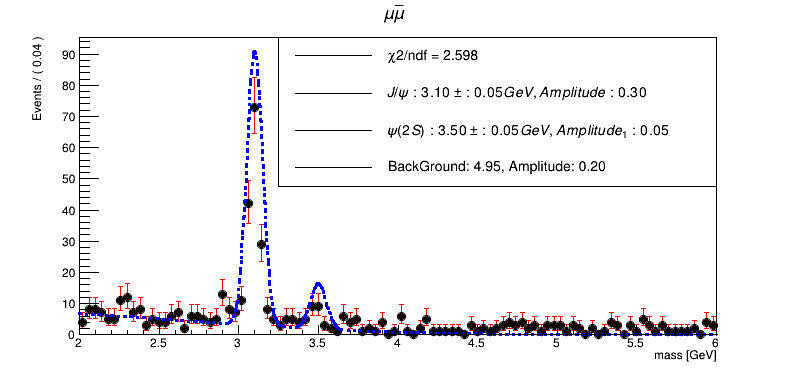

In [260]:

frame3.SetStats(0)  # Desativa o StatBox
chi2_value = frame3.chiSquare()
legend = ROOT.TLegend(0.35, 0.5, 0.9, 0.9)
legend.SetFillColor(0)
legend.SetTextSize(0.04)
legend.AddEntry("", "#chi2/ndf = {:.3f}".format(chi2_value), "l")

# Adicionando as entradas à legenda
legend.AddEntry(sum_pdf, "J/ \psi: {:.2f} \pm: {:.2f} GeV, Amplitude: {:.2f}".format(mean_gauss.getVal(), sigma_gauss.getVal(), sinal.getVal()), "l")
legend.AddEntry(sum_pdf, " \psi (2S): {:.2f} \pm: {:.2f} GeV, Amplitude_1: {:.2f}".format(mean_gauss_1.getVal(), sigma_gauss_1.getVal(), sinal_1.getVal()), "l")
legend.AddEntry(sum_pdf, "BackGround: {:.2f}, Amplitude: {:.2f}".format(argpar.getVal(), sinal_2.getVal()), "l")
# Plotando os resultados
#nt.statOn(frame3)
c3 = TCanvas("exemplo03","exemplo03",800,400)
frame3.Draw()
legend.Draw()
c3.Draw()

sum_pdf.Print("t")
c3.Print("mass.png")

In [255]:
chi2_value = frame3.chiSquare()
